<a href="https://colab.research.google.com/github/sakathia/Data110/blob/main/Data110_Week_5_Sandra_Aching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Uncovering Insights from the Titanic Dataset

## Objective:
This assignment focuses on using the Titanic dataset (available in the Seaborn library) to extract meaningful insights, emphasizing histograms and KDE plots. Instead of just plotting graphs, the focus is on interpreting the results, asking thoughtful questions, and connecting findings to real-world scenarios.

## Instructions:
You are required to perform a detailed analysis of the Titanic dataset using histograms and KDE plots to uncover insights. Use visualizations to support your claims, but primarily focus on interpreting the data.

### Loading the Dataset:
The Titanic dataset can be accessed from the Seaborn library. Use the following code to load the dataset:

```python
import seaborn as sns
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# View the first few rows of the dataset
titanic.head()
```

## Assignment Outline


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# View the first few rows of the dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Part 1: Understanding the Dataset
1. **Task 1: Dataset Overview**  
   - Briefly describe the Titanic dataset. What kind of information is contained in each column?  
   *Deliverable*: Write a paragraph summarizing the dataset based on your exploration.

In [4]:
titanic.columns # Gives us the column names of the titanic data set

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [5]:
titanic.dtypes # Gives us the data type of each column

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


In [6]:
titanic.shape # Gives us the number of rows and columns

(891, 15)

In [7]:
titanic.describe() # Gives us the summary statistics of the titanic data

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Answer: There are 15 columns in the Titanic dataset from the seaborn library. The information in each column contains information about the passengers that boarded the titanic boat. The information ranges detailing the passenger class, if the passenger survived the titanic incident, and how much the fare was, from what location the passenger embarked, their age and other passenger information relating to if they boarded the Titantic with family. From the details we have from the summary statisics, we can see that 50% of the passengers were on average 28 years old. Then, we can also see that the fare ranged from about 7.91 to 31 dollars based on the 25th and 75th percentile. Therefore, we are able to derive different insights into the passengers who boarded the titanic.

### Part 2: Fare and Survival Analysis
2. **Task 2: Fare Distribution**  
   - Plot a histogram and KDE for the distribution of fares paid by passengers.  
   *Question*: What trends or outliers do you observe in the fare distribution? How might fare impact survival rates?

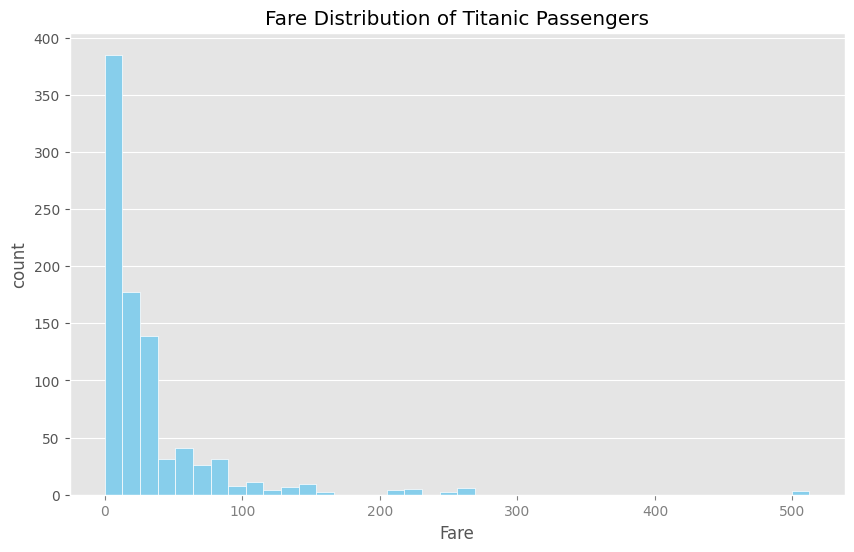

In [17]:
#Histogram of the Fare Distribution of Titanic Passengers
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.hist(titanic['fare'], bins = 40, color='skyblue',edgecolor='white')
plt.title('Fare Distribution of Titanic Passengers')
plt.xlabel('Fare')
plt.ylabel('count')
plt.grid(axis='x')
plt.tick_params(axis='x', colors='gray')  # Set x-axis tick colors to gray
plt.show()

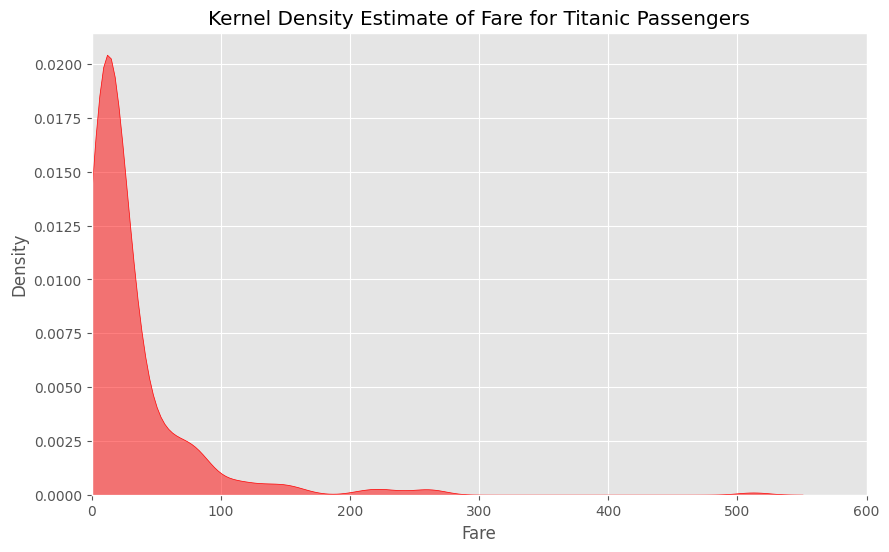

In [22]:
plt.figure(figsize=(10, 6))
sns.kdeplot(titanic['fare'], fill=True, color="red", alpha=0.5)
plt.title('Kernel Density Estimate of Fare for Titanic Passengers')
plt.xlabel('Fare')
# Set x-axis limits for clarity
plt.xlim(0, 600)
plt.ylabel('Density')
plt.show()

Answer: The trend that can be seen is that a majority of the passengers paid a lower fare. The distributions in both case is right skewed indicating that there were fewer passengers who paid higher fares. From the context we can mostly derive that the passengers in the high classes paid a higher fare and those who paid lower fares were in the lower classes. Fare may have impacted where the passengers would be located in the boat. The higher the fare, it meant that the passenger was put in more luxurious cabins and most likely had access to the resources needed to survive than passengers who paid lower fares as from context, we know that the lower class rooms were located in the lower floors of the boat meaning they did not have easy access to the resources for survival.

3. **Task 3: Fare and Survival Rates**  
   - Create a KDE plot to compare the fare distributions for survivors and non-survivors.  
   *Question*: Does fare seem to have influenced survival? What do the distributions suggest about socioeconomic status and survival?

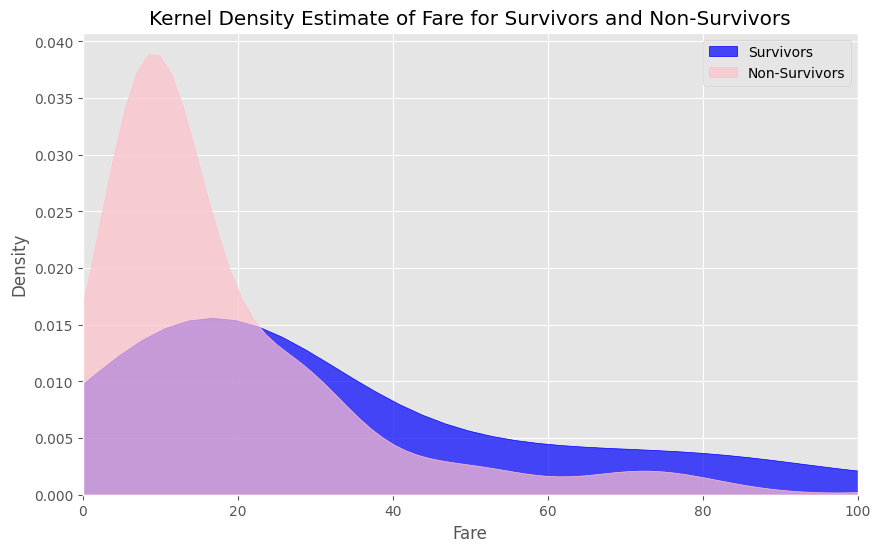

In [28]:
plt.figure(figsize=(10, 6))

# KDE for Survivors
sns.kdeplot(titanic[titanic['survived'] == 1]['fare'], bw_adjust=0.7, fill=True, color="blue", alpha=0.7, label='Survivors')

# KDE for Non-Survivors
sns.kdeplot(titanic[titanic['survived'] == 0 ] ['fare'], bw_adjust=0.7, fill=True, color="pink", alpha=0.7, label='Non-Survivors')

# Set plot title and labels
plt.title('Kernel Density Estimate of Fare for Survivors and Non-Survivors')
plt.xlabel('Fare')
plt.ylabel('Density')

# Add a legend to distinguish the lines
plt.legend()

# Set x-axis limits for clarity
plt.xlim(0, 100)

# Show the plot
plt.show()

Answer: Fare does seem to have influenced survival as passengers who paid more fare survived a lot more than passengers who paid lower fares. This is most likely due to higher fares giving more access to better cabins and resources and location as those who paid higher fares were placed closer to the top of the boat than those who paid lower fares. This indicates in terms of socioeconomic status that those who had the economic means to pay higher fares were the higher class and thus had more resources and the ability to survive than the lower class passengers who paid lower fares.

### Part 3: Class, Fare, and Survival Insights
4. **Task 4: Passenger Class, Fare, and Survival**  
   - Create histograms and KDE plots to compare fare distributions across different passenger classes (`Pclass`) and analyze survival rates for each class.  
   *Question*: What patterns do you observe in fare distribution and survival rates across different classes? How does this reflect the socioeconomic divisions on the Titanic?


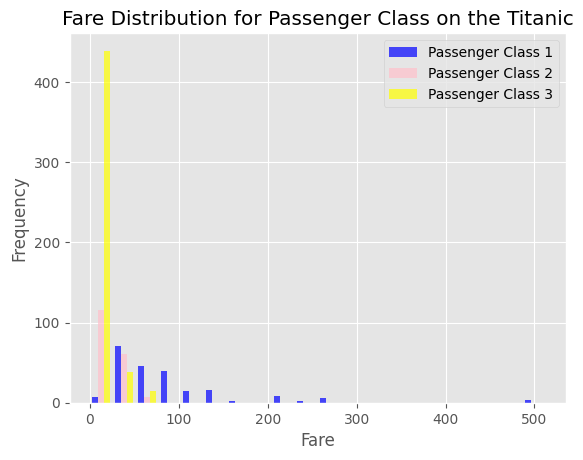

In [33]:
pclass_1= titanic[titanic['pclass'] == 1]['fare']
pclass_2= titanic[titanic['pclass'] == 2 ] ['fare']
pclass_3= titanic[titanic['pclass'] == 3 ] ['fare']

# Histogram for Passenger Classes
plt.hist([pclass_1, pclass_2, pclass_3], bins=20, color=['blue', 'pink', 'yellow'], alpha=0.7, label=['Passenger Class 1', 'Passenger Class 2', 'Passenger Class 3'])


# Set plot title and labels
plt.title('Fare Distribution for Passenger Class on the Titanic')
plt.xlabel('Fare')
plt.ylabel('Frequency')

# Add a legend to distinguish the lines
plt.legend()

# Show the plot
plt.show()

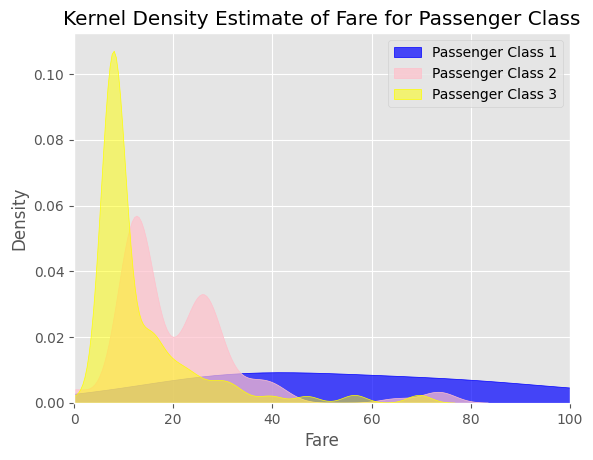

In [27]:
# KDE for Passenger Class 1
sns.kdeplot(titanic[titanic['pclass'] == 1]['fare'], bw_adjust=0.7, fill=True, color="blue", alpha=0.7, label='Passenger Class 1')

# KDE for Passenger Class 2
sns.kdeplot(titanic[titanic['pclass'] == 2 ] ['fare'], bw_adjust=0.7, fill=True, color="pink", alpha=0.7, label='Passenger Class 2')

# KDE for Passenger Class 3
sns.kdeplot(titanic[titanic['pclass'] == 3 ] ['fare'], bw_adjust=0.7, fill=True, color="yellow", alpha=0.5, label='Passenger Class 3')

# Set plot title and labels
plt.title('Kernel Density Estimate of Fare for Passenger Class')
plt.xlabel('Fare')
plt.ylabel('Density')

# Add a legend to distinguish the lines
plt.legend()

# Set x-axis limits for clarity
plt.xlim(0, 100)

# Show the plot
plt.show()

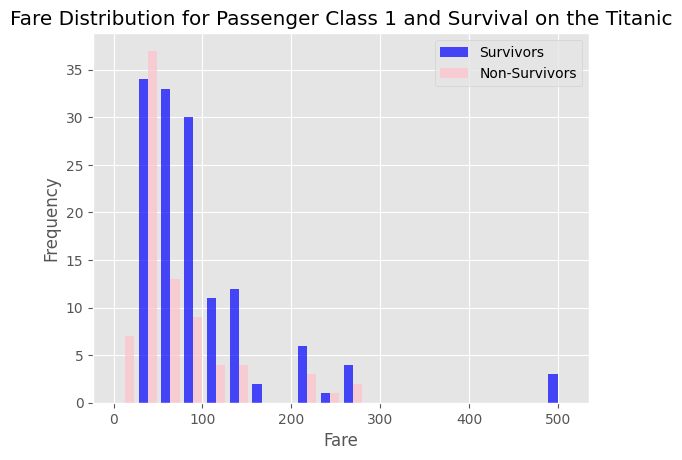

In [36]:
#Analyzing the survival rates for Passenger Class 1 based on Fare
pclass_1_S= titanic[(titanic['pclass'] == 1) & (titanic ['survived'] ==1)]['fare']
pclass_1_N= titanic[(titanic['pclass'] == 1) & (titanic ['survived'] ==0)]['fare']

# Histogram for Passenger Class 1 and Survival
plt.hist([pclass_1_S, pclass_1_N], bins=20, color=['blue', 'pink'], alpha=0.7, label=['Survivors', 'Non-Survivors'])


# Set plot title and labels
plt.title('Fare Distribution for Passenger Class 1 and Survival on the Titanic')
plt.xlabel('Fare')
plt.ylabel('Frequency')

# Add a legend to distinguish the lines
plt.legend()

# Show the plot
plt.show()

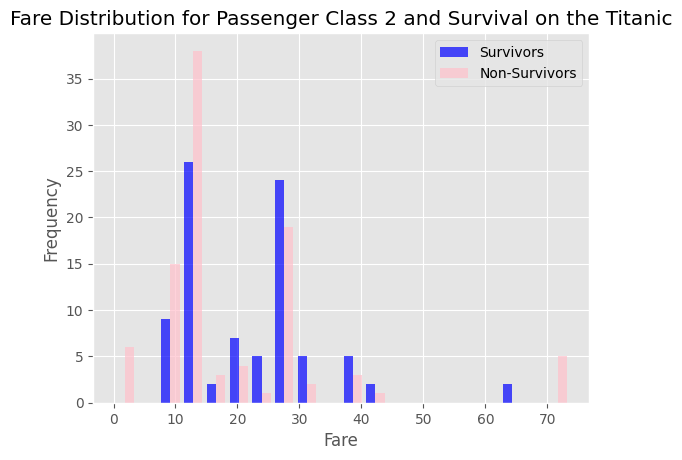

In [37]:
#Analyzing the survival rates for Passenger Class 2 based on Fare
pclass_2_S= titanic[(titanic['pclass'] == 2) & (titanic ['survived'] ==1)]['fare']
pclass_2_N= titanic[(titanic['pclass'] == 2) & (titanic ['survived'] ==0)]['fare']

# Histogram for Passenger Class 2 and Survival
plt.hist([pclass_2_S, pclass_2_N], bins=20, color=['blue', 'pink'], alpha=0.7, label=['Survivors', 'Non-Survivors'])


# Set plot title and labels
plt.title('Fare Distribution for Passenger Class 2 and Survival on the Titanic')
plt.xlabel('Fare')
plt.ylabel('Frequency')

# Add a legend to distinguish the lines
plt.legend()

# Show the plot
plt.show()

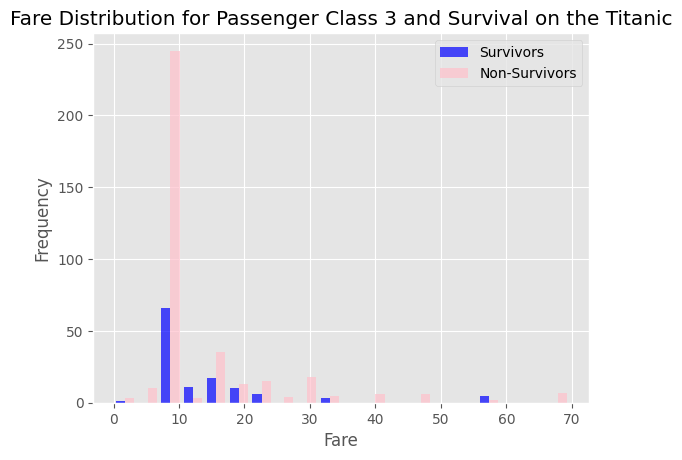

In [38]:
#Analyzing the survival rates for Passenger Class 3 based on Fare
pclass_3_S= titanic[(titanic['pclass'] == 3) & (titanic ['survived'] ==1)]['fare']
pclass_3_N= titanic[(titanic['pclass'] == 3) & (titanic ['survived'] ==0)]['fare']

# Histogram for Passenger Class 3 and Survival
plt.hist([pclass_3_S, pclass_3_N], bins=20, color=['blue', 'pink'], alpha=0.7, label=['Survivors', 'Non-Survivors'])


# Set plot title and labels
plt.title('Fare Distribution for Passenger Class 3 and Survival on the Titanic')
plt.xlabel('Fare')
plt.ylabel('Frequency')

# Add a legend to distinguish the lines
plt.legend()

# Show the plot
plt.show()

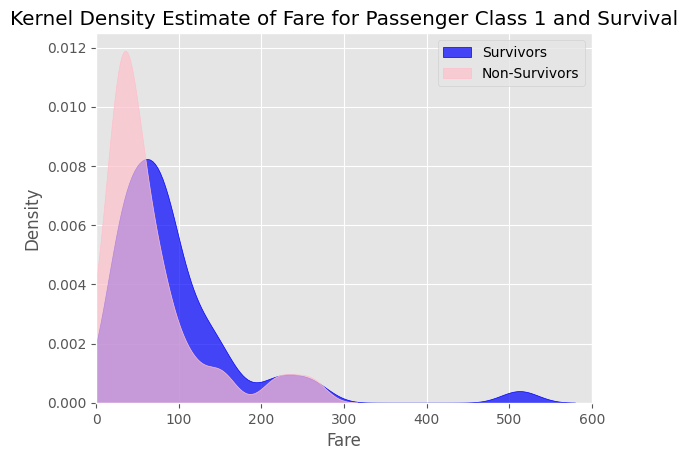

In [44]:
# KDE for Passenger Class 1 and Survival
sns.kdeplot(titanic[(titanic['pclass'] == 1) & (titanic['survived']==1)]['fare'], bw_adjust=0.7, fill=True, color="blue", alpha=0.7, label='Survivors')

# KDE for Passenger Class 1 and Non-Survival
sns.kdeplot(titanic[(titanic['pclass'] == 1) & (titanic['survived']==0)]['fare'], bw_adjust=0.7, fill=True, color="pink", alpha=0.7, label='Non-Survivors')

# Set plot title and labels
plt.title('Kernel Density Estimate of Fare for Passenger Class 1 and Survival')
plt.xlabel('Fare')
plt.ylabel('Density')

# Set x-axis limits for clarity
plt.xlim(0, 600)

# Add a legend to distinguish the lines
plt.legend()

# Show the plot
plt.show()

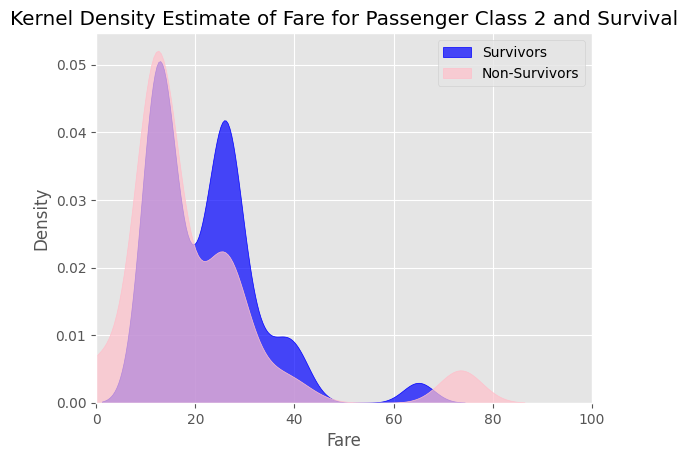

In [45]:
# KDE for Passenger Class 2 and Survival
sns.kdeplot(titanic[(titanic['pclass'] == 2) & (titanic['survived']==1)]['fare'], bw_adjust=0.7, fill=True, color="blue", alpha=0.7, label='Survivors')

# KDE for Passenger Class 2 and Non-Survival
sns.kdeplot(titanic[(titanic['pclass'] == 2) & (titanic['survived']==0)]['fare'], bw_adjust=0.7, fill=True, color="pink", alpha=0.7, label='Non-Survivors')

# Set plot title and labels
plt.title('Kernel Density Estimate of Fare for Passenger Class 2 and Survival')
plt.xlabel('Fare')
plt.ylabel('Density')

# Set x-axis limits for clarity
plt.xlim(0, 100)

# Add a legend to distinguish the lines
plt.legend()

# Show the plot
plt.show()

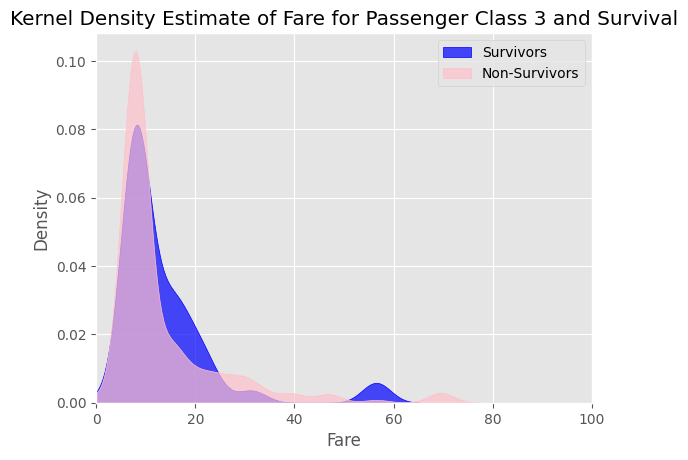

In [46]:
# KDE for Passenger Class 3 and Survival
sns.kdeplot(titanic[(titanic['pclass'] == 3) & (titanic['survived']==1)]['fare'], bw_adjust=0.7, fill=True, color="blue", alpha=0.7, label='Survivors')

# KDE for Passenger Class 3 and Non-Survival
sns.kdeplot(titanic[(titanic['pclass'] == 3) & (titanic['survived']==0)]['fare'], bw_adjust=0.7, fill=True, color="pink", alpha=0.7, label='Non-Survivors')

# Set plot title and labels
plt.title('Kernel Density Estimate of Fare for Passenger Class 3 and Survival')
plt.xlabel('Fare')
plt.ylabel('Density')

# Set x-axis limits for clarity
plt.xlim(0, 100)

# Add a legend to distinguish the lines
plt.legend()

# Show the plot
plt.show()

Answer: Passenger class 1 paid more higher fares and had a more spread out distribution with some outliers being shown indicating that some passengers had the means to pay higher fares for better cabins highlighting that these passengers were from the wealthier class. Then, there is not much fare variation in the passenger class 2 distribution as seen in the passenger 1 distribution but the range indicates a middle class status. For the passenger 3 class fare distribution is more centrated in lower fares indicating a low class status. In terms of survival, the trends show that as passengers paid higher fares, they had higher chances of survival. Non-Survival was more concentrated in the lower fares. This means that higher fares were associated most likely with better cabins and were most likely closer to resources for survival than lower fares that placed pasengers in lower parts of the boat and with less resources for survival.

### Part 4: Age and Survival
5. **Task 5: Age of Survivors and Non-Survivors**  
   - Create KDE plots to compare the age distributions of survivors and non-survivors.  
   *Question*: What trends do you notice in the age distribution of survivors compared to those who did not survive? How might age have impacted survival rates?


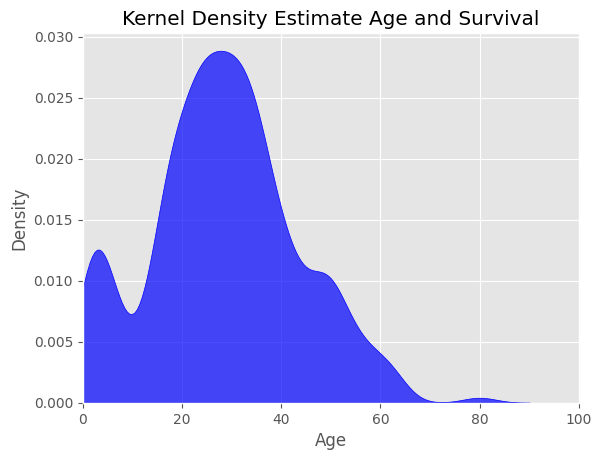

In [49]:
# KDE for Age and Survival
sns.kdeplot(titanic[titanic['survived'] == 1]['age'], bw_adjust=0.7, fill=True, color="blue", alpha=0.7)

# Set plot title and labels
plt.title('Kernel Density Estimate Age and Survival')
plt.xlabel('Age')
plt.ylabel('Density')

# Set x-axis limits for clarity
plt.xlim(0, 100)


# Show the plot
plt.show()

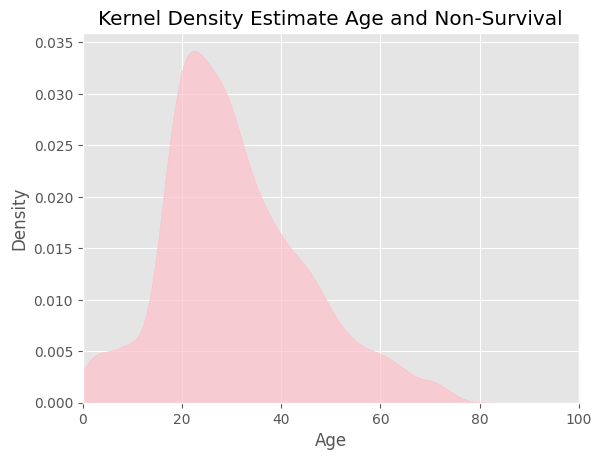

In [50]:
# KDE for Age and Non-Survival
sns.kdeplot(titanic[titanic['survived'] == 0]['age'], bw_adjust=0.7, fill=True, color="pink", alpha=0.7)

# Set plot title and labels
plt.title('Kernel Density Estimate Age and Non-Survival')
plt.xlabel('Age')
plt.ylabel('Density')

# Set x-axis limits for clarity
plt.xlim(0, 100)


# Show the plot
plt.show()

Answer: The density for the age and survival and non-survival seem to be similar with some differences in the age ranges. Passengers who survived were mostly concentrated between the ages of 20 and 50. Then passengers who did not survive the Titanic incident were mostly concentrated between the ages of 15 and 35. Age may have affected the survival rates but it can only be inferred in relation to economic means. We can identify that most likely passengers who were older had more more access to the resources to survive like the life boats than those who were younger. However, we would have to analyze these in addition to other factors like socioeconomic status.

6. **Task 6: Pyramid Histogram for Age Survival by Sex**  
   - Create a **pyramid-style histogram** (also known as a population pyramid) for age, showing survival data split by sex. If possible, attempt to find or create one.  
   *Question*: What can you infer from the age and sex distribution in relation to survival rates?


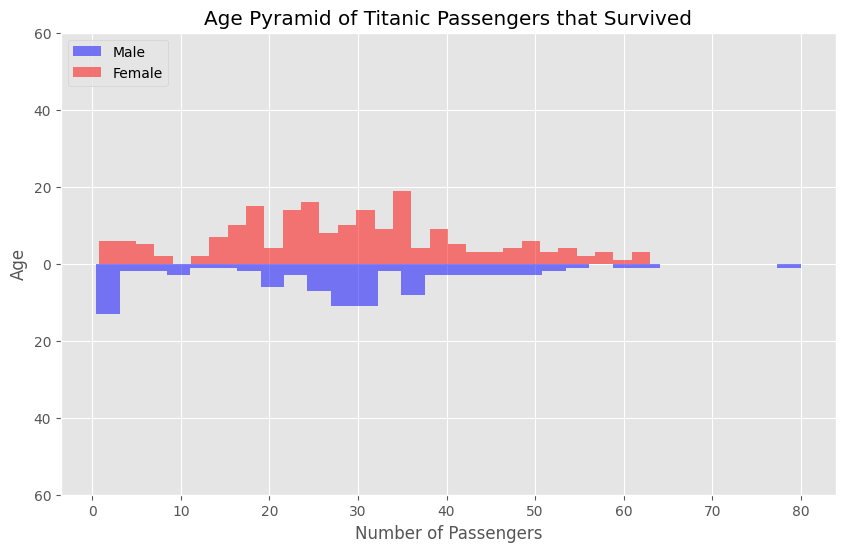

In [59]:
# Filter male and female ages that survived, dropping NaN values
ages_male_survived = titanic[(titanic['sex'] == 'male')&(titanic['survived']==1)]['age'].dropna()
ages_female_survived = titanic[(titanic['sex'] == 'female')&(titanic['survived']==1)]['age'].dropna()

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot the male histogram, mirrored to the left (negative weights)
plt.hist(ages_male_survived, bins=30, label='Male', alpha=0.5, color='blue', orientation='vertical', weights=[-1] * len(ages_male_survived))

# Plot the female histogram on the right side (default)
plt.hist(ages_female_survived, bins=30, label='Female', alpha=0.5, color='red', orientation='vertical')

# Add labels and title
plt.xlabel('Number of Passengers')
plt.ylabel('Age')
plt.title('Age Pyramid of Titanic Passengers that Survived')

# Customize ticks on the x-axis to show positive values for both sides
plt.yticks([-60, -40, -20, 0, 20, 40, 60], [60, 40, 20, 0, 20, 40, 60])

# Add a legend
plt.legend(loc='upper left')

# Show the plot
plt.show()

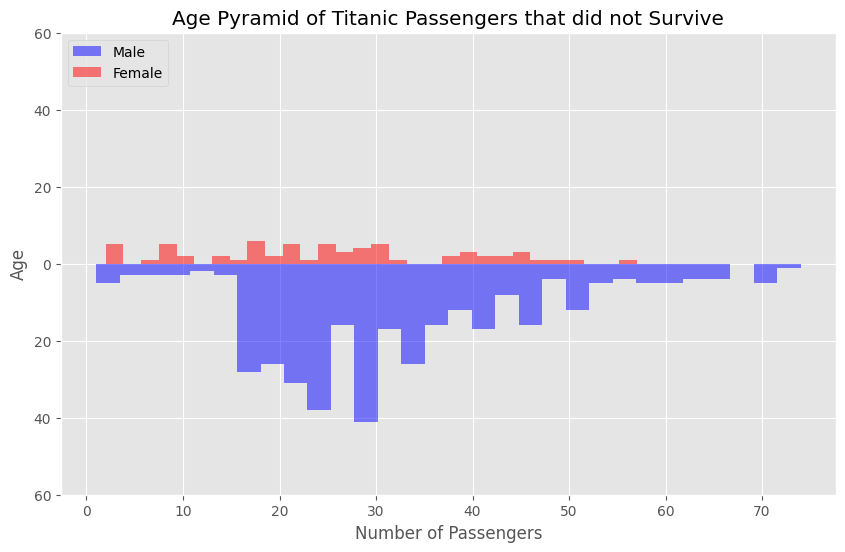

In [60]:
# Filter male and female ages that did not survive, dropping NaN values
ages_male_No_survive = titanic[(titanic['sex'] == 'male')&(titanic['survived']==0)]['age'].dropna()
ages_female_No_survive = titanic[(titanic['sex'] == 'female')&(titanic['survived']==0)]['age'].dropna()

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot the male histogram, mirrored to the left (negative weights)
plt.hist(ages_male_No_survive, bins=30, label='Male', alpha=0.5, color='blue', orientation='vertical', weights=[-1] * len(ages_male_No_survive))

# Plot the female histogram on the right side (default)
plt.hist(ages_female_No_survive, bins=30, label='Female', alpha=0.5, color='red', orientation='vertical')

# Add labels and title
plt.xlabel('Number of Passengers')
plt.ylabel('Age')
plt.title('Age Pyramid of Titanic Passengers that did not Survive')

# Customize ticks on the x-axis to show positive values for both sides
plt.yticks([-60, -40, -20, 0, 20, 40, 60], [60, 40, 20, 0, 20, 40, 60])

# Add a legend
plt.legend(loc='upper left')

# Show the plot
plt.show()

Answer: The distribution for age and gender in terms of survival shows that women had the most survival rates in comparison to men between all age groups. This can be relate to the context that during the decisions for putting people in the lifeboats, that it was decided that women should be in life boats first. Younger age groups had more survival rates than non survival as it can be that it was decided to save and put children and women in life boats first. Men in mostly all age groups that high Non-Survival rates contributing to the conclusion that the boat administration decided to save women and children first and may have not gotten to a life boat in time during the sinking of the boat. There may also be factors to consider and analyze like socio-economic status since age and gender do not seem to alone determine if they were the deciding factors for survival.